In [1]:
import os
import numpy as np
from sklearn.cluster import KMeans
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image as keras_image

Load and preprocess images:

In [2]:
def load_image(image_path, target_size=(224, 224)):
    img = keras_image.load_img(image_path, target_size=target_size)
    img = keras_image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

image_dir = r'E:\Project\photogrammetry\src\data\grey-dice\images'
image_files = os.listdir(image_dir)

images = [load_image(os.path.join(image_dir, f)) for f in image_files]
images = np.vstack(images)

Load pre-trained ResNet50 model and extract features:

In [3]:
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

features = model.predict(images)

1/1 [==============================] - 2s 2s/step


implement the elbow method to find optimal clusters number

e:\Project\photogrammetry\testVenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\Project\photogrammetry\testVenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\Project\photogrammetry\testVenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\Project\photogrammetry\testVenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\Project\photo

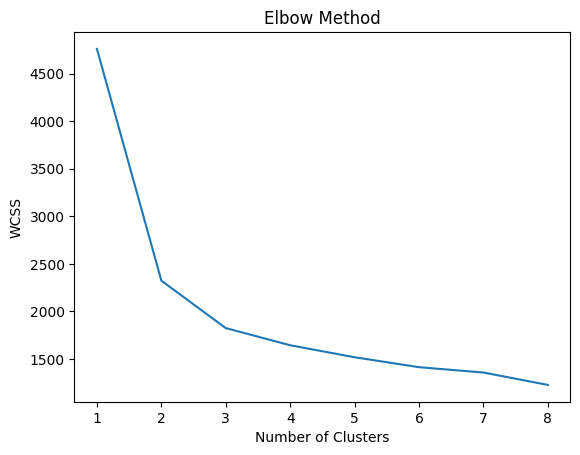

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different numbers of clusters
wcss = []
max_clusters = 170
for i in range(1, 8 + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 8 + 1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Apply K-means clustering:

In [12]:
kmeans = KMeans(n_clusters=15, random_state=42)
clusters = kmeans.fit_predict(features)

e:\Project\photogrammetry\testVenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Group images by cluster:

In [13]:
clustered_images = {}
for i, cluster in enumerate(clusters):
    if cluster not in clustered_images:
        clustered_images[cluster] = []
    clustered_images[cluster].append(image_files[i])

In [14]:
print(clusters)
print(clusters.shape)

[ 1  0  8 13  1  0  8  2  1  2  2  2 12  9  2  9  3  5  6 12  4  4 10  6
  7  7  3 14 14  2 11]
(31,)


In [15]:
import cv2 as OpenCV
import matplotlib.pyplot as plt

def display_rgb_image(path, title):
    rgb_image = OpenCV.cvtColor(OpenCV.imread(path), OpenCV.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    if title is not None:
        plt.title(title)
    plt.axis('off')
    plt.show()

image_dir = r'E:\Project\photogrammetry\src\data\grey-dice\images'
image_files = os.listdir(image_dir)

def display_similar_images(key, values):
    print(f"cluster {key}")
    print("-----------------------------------------------------")
    for value in values:
            print(value)
            display_rgb_image(os.path.join(image_dir, value), value)

In [16]:
print(clustered_images.keys())

dict_keys([1, 0, 8, 13, 2, 12, 9, 3, 5, 6, 4, 10, 7, 14, 11])


In [17]:
print(sum(len(clustered_images[i]) for i in clustered_images.keys()))

31


cluster 1
-----------------------------------------------------
01.JPG


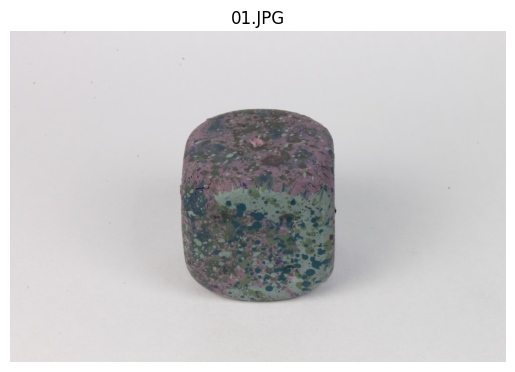

05.JPG


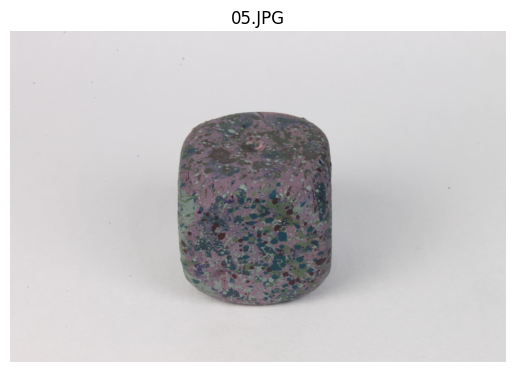

09.JPG


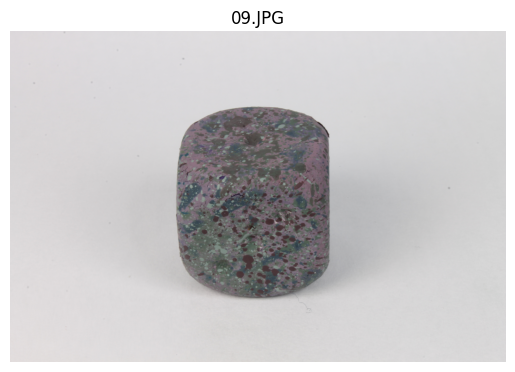

cluster 0
-----------------------------------------------------
02.JPG


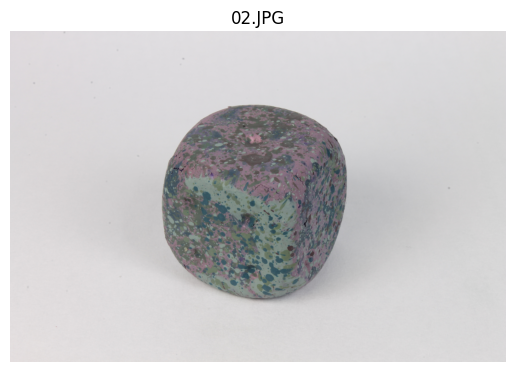

06.JPG


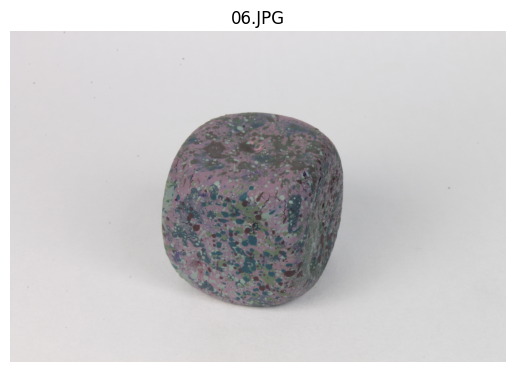

cluster 8
-----------------------------------------------------
03.JPG


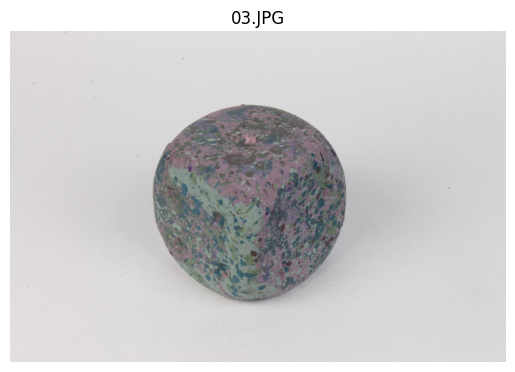

07.JPG


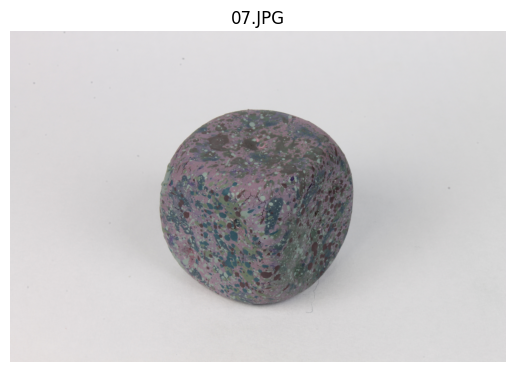

cluster 13
-----------------------------------------------------
04.JPG


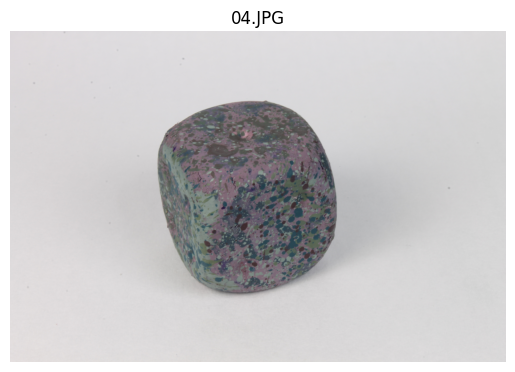

cluster 2
-----------------------------------------------------
08.JPG


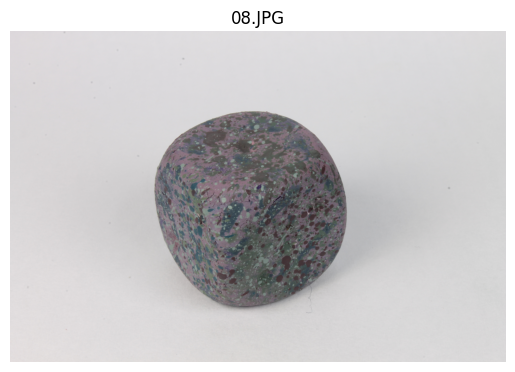

10.JPG


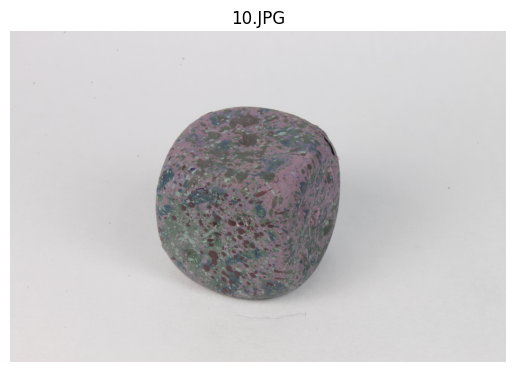

11.JPG


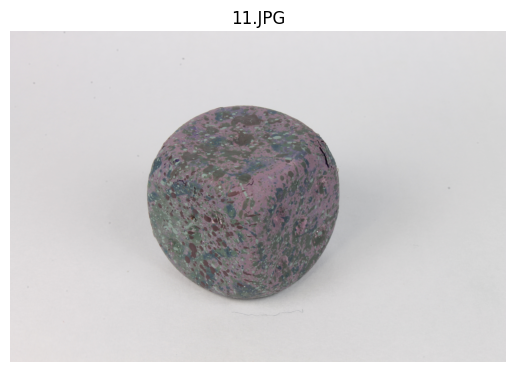

12.JPG


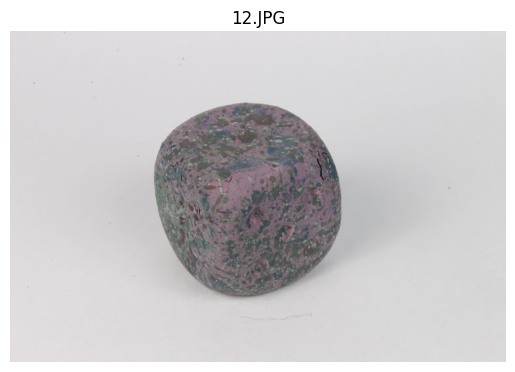

15.JPG


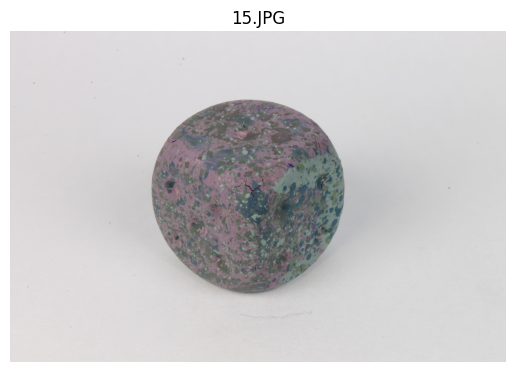

32.JPG


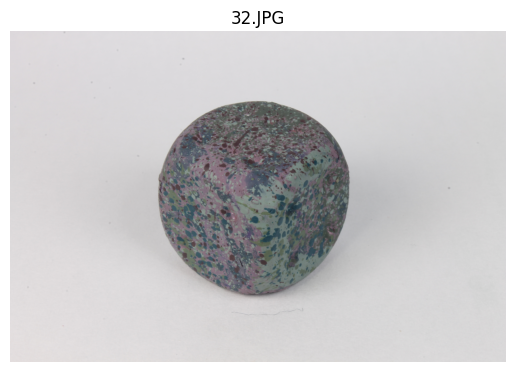

cluster 12
-----------------------------------------------------
13.JPG


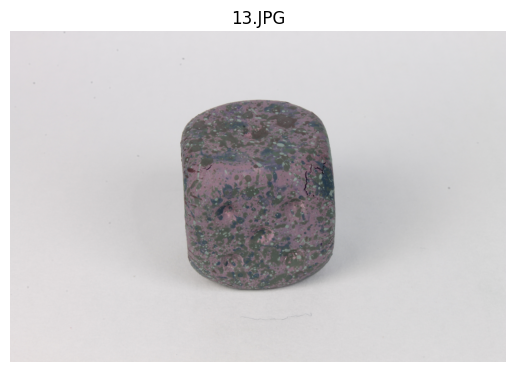

21.JPG


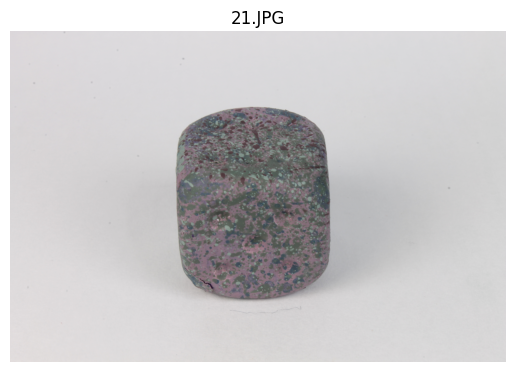

cluster 9
-----------------------------------------------------
14.JPG


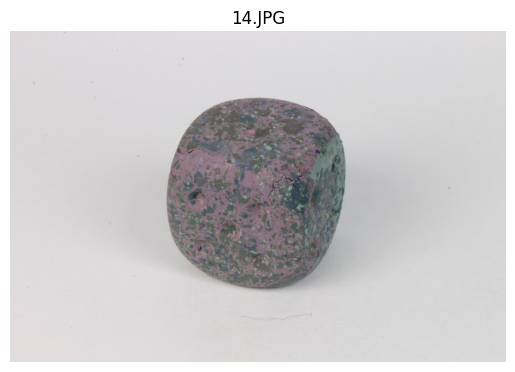

16.JPG


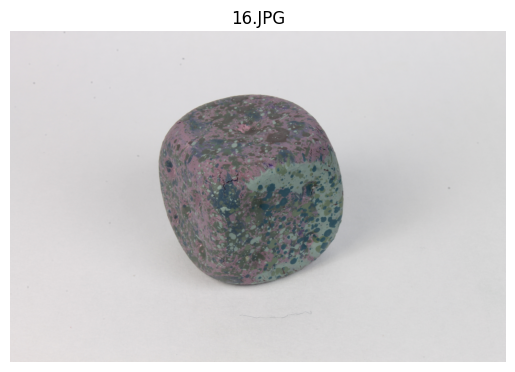

cluster 3
-----------------------------------------------------
17.JPG


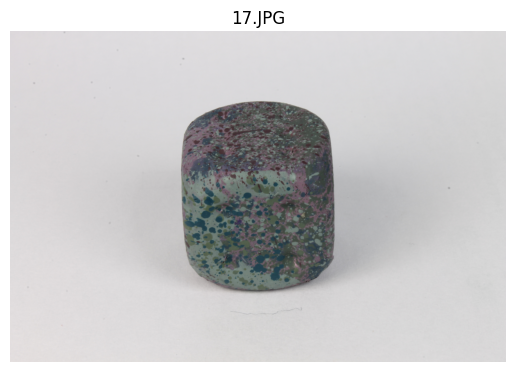

29.JPG


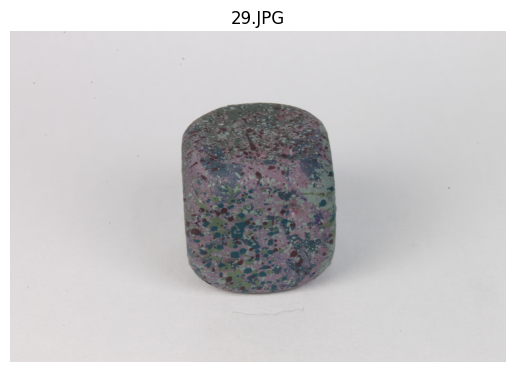

cluster 5
-----------------------------------------------------
18.JPG


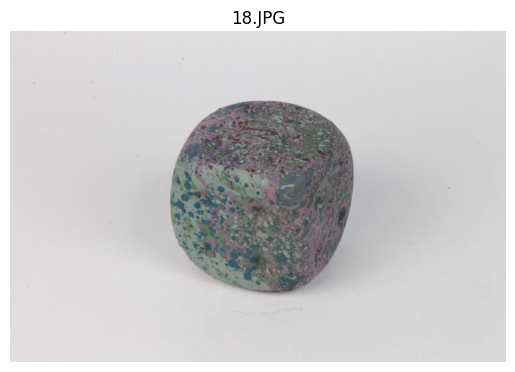

cluster 6
-----------------------------------------------------
20.JPG


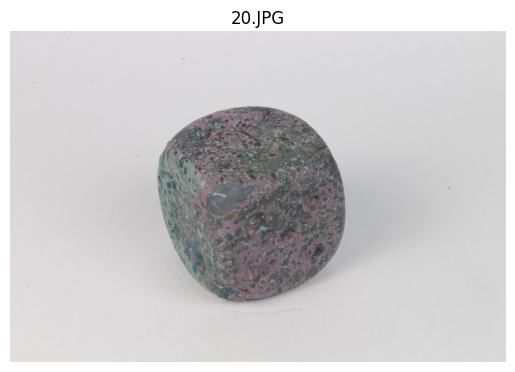

26.JPG


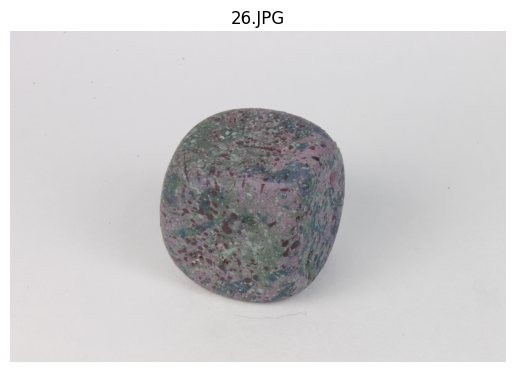

cluster 4
-----------------------------------------------------
22.JPG


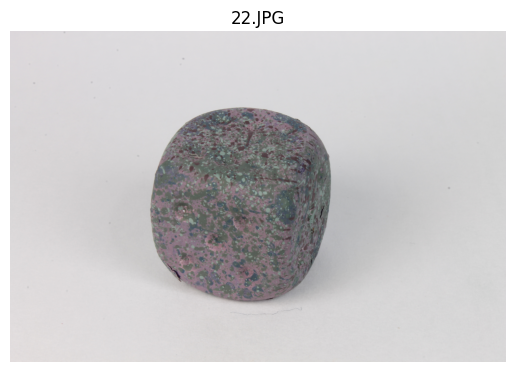

24.JPG


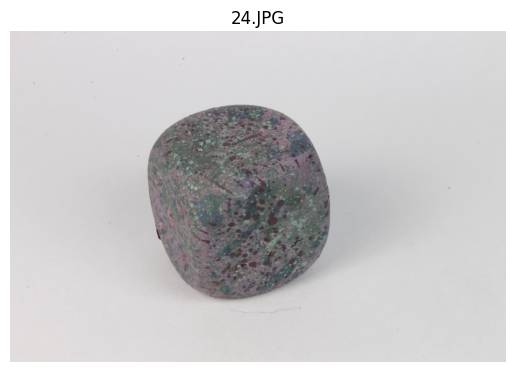

cluster 10
-----------------------------------------------------
25.JPG


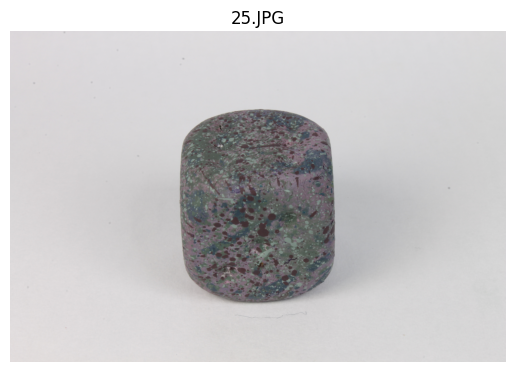

cluster 7
-----------------------------------------------------
27.JPG


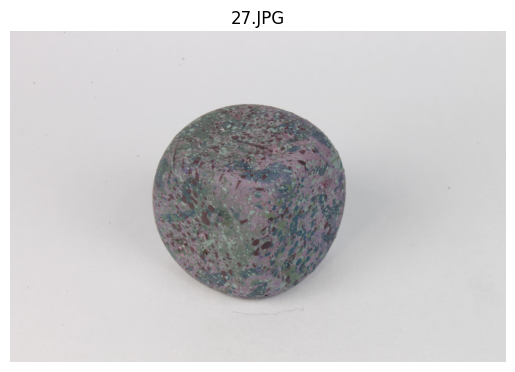

28.JPG


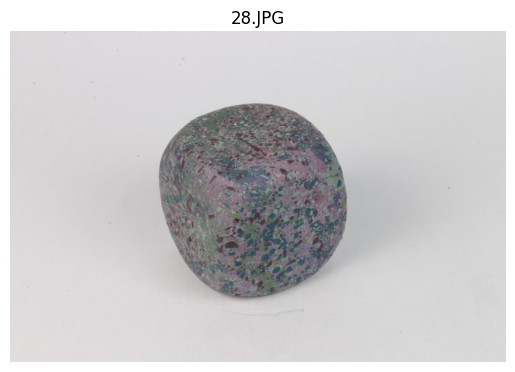

cluster 14
-----------------------------------------------------
30.JPG


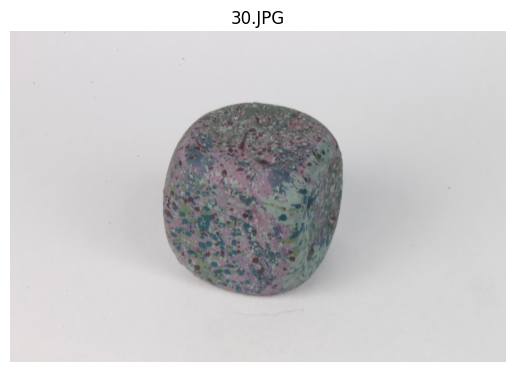

31.JPG


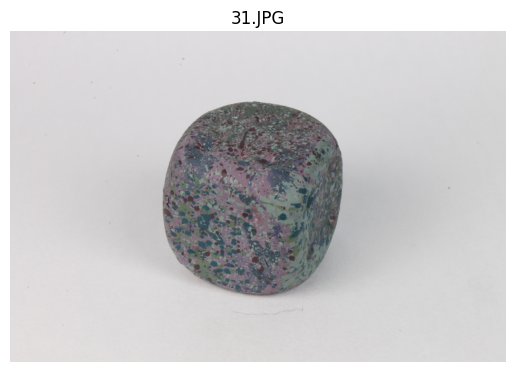

cluster 11
-----------------------------------------------------
33.JPG


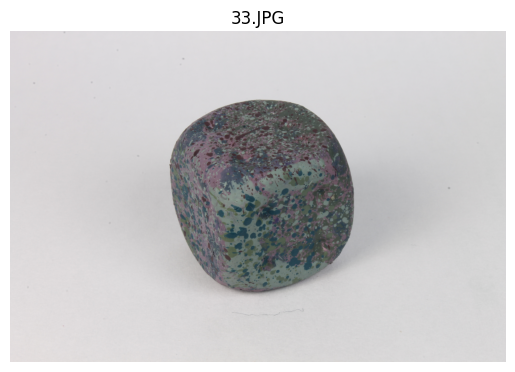

In [18]:
for key, values in clustered_images.items():
    display_similar_images(key, values)